<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


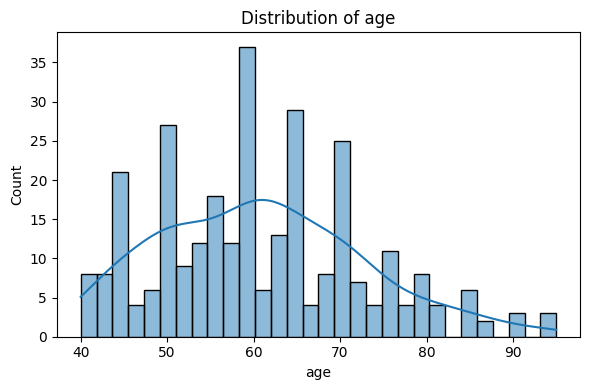

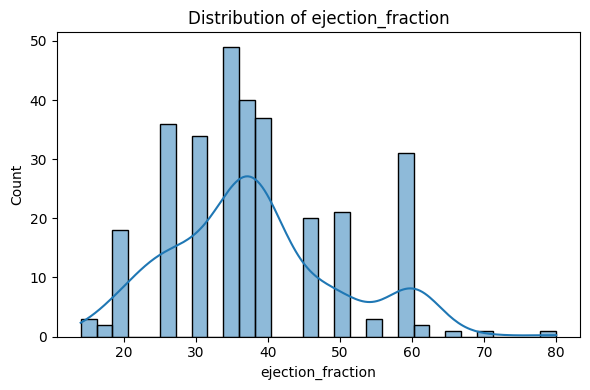

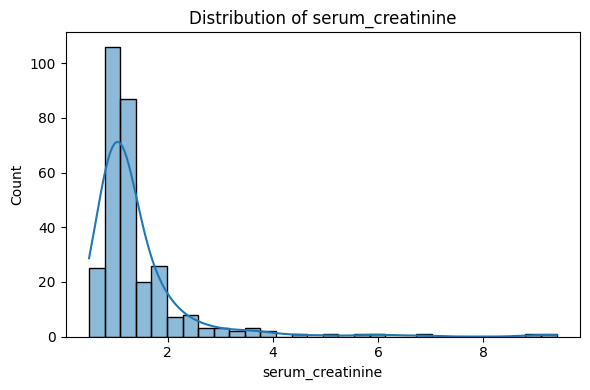

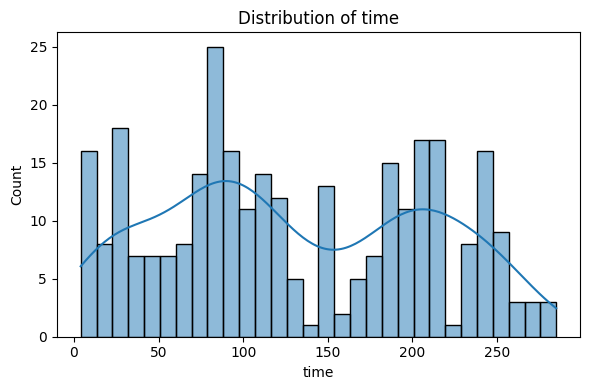

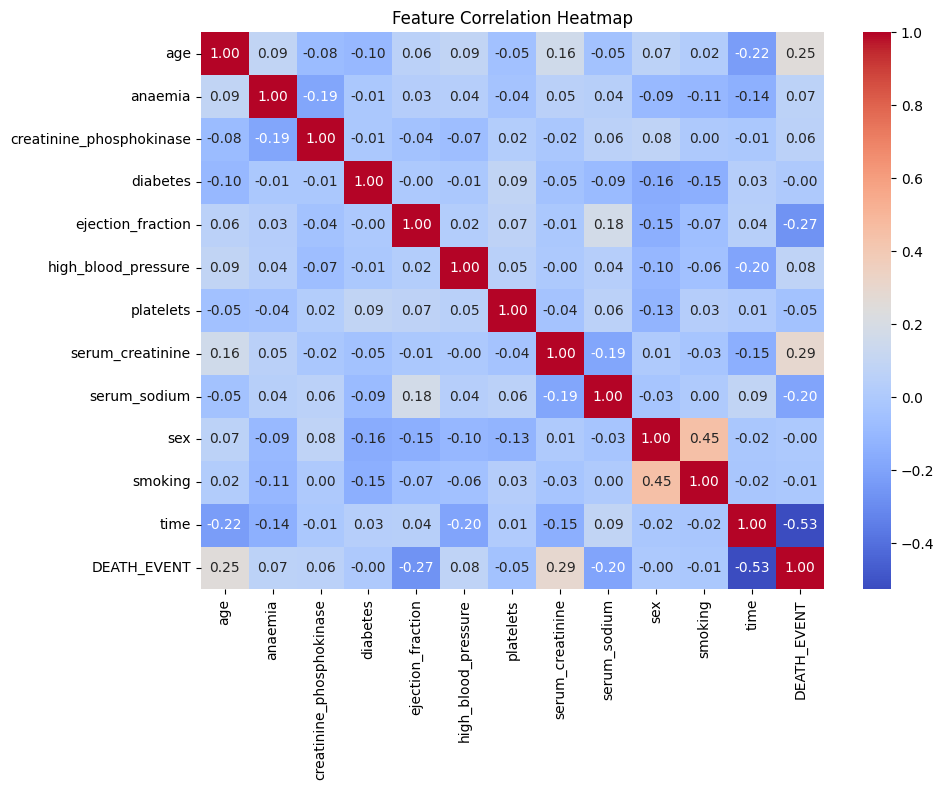

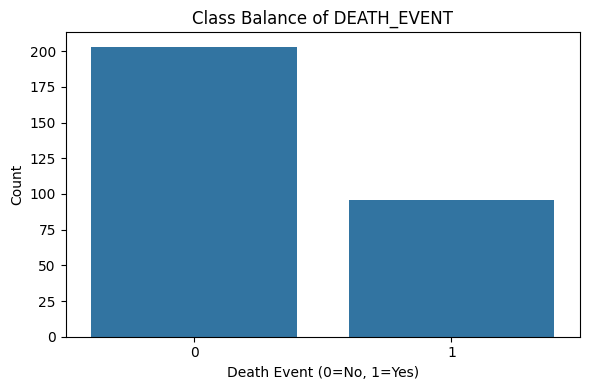


Key Insights from the Data:

1. Age Distribution: Older patients (above 60) show more instances of death.
2. Ejection Fraction: Lower values (below 30%) are more common among those who died, indicating poor heart pumping efficiency.
3. Serum Creatinine: Higher values (above 1.5 mg/dL) correlate with higher death rate — possibly due to poor kidney function.
4. Time: Patients who lived longer since follow-up have lower death rates — suggesting survival beyond early treatment is critical.
5. Correlation: 'serum_creatinine' and 'ejection_fraction' show strong correlations with DEATH_EVENT. These are critical biomarkers.

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



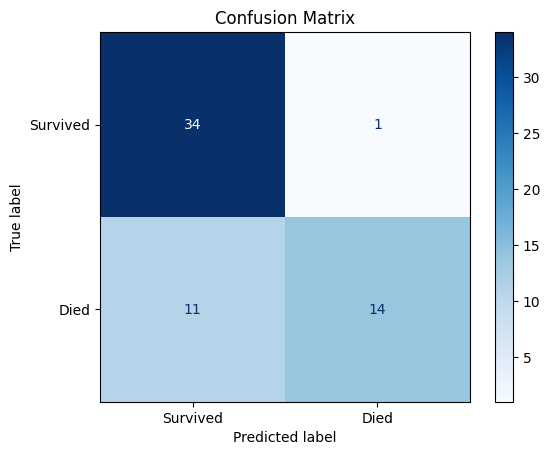

In [3]:
# Predicting Mortality of Heart Failure Patients

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv(r"C:\\Users\\shriv\\Downloads\\heart_failure_clinical_records_dataset.csv")

# Display the first few rows of the dataset
data.head()

# Summary statistics and info
data.info()
data.describe()

# Check for null values
data.isnull().sum()

# ------------------------------
# Data Visualization & Analysis
# ------------------------------

# Feature distribution
features = ['age', 'ejection_fraction', 'serum_creatinine', 'time']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Class balance visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Class Balance of DEATH_EVENT')
plt.xlabel('Death Event (0=No, 1=Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# -----------------------------
# Insights and Key Observations
# -----------------------------

print("\nKey Insights from the Data:\n")
print("1. Age Distribution: Older patients (above 60) show more instances of death.")
print("2. Ejection Fraction: Lower values (below 30%) are more common among those who died, indicating poor heart pumping efficiency.")
print("3. Serum Creatinine: Higher values (above 1.5 mg/dL) correlate with higher death rate — possibly due to poor kidney function.")
print("4. Time: Patients who lived longer since follow-up have lower death rates — suggesting survival beyond early treatment is critical.")
print("5. Correlation: 'serum_creatinine' and 'ejection_fraction' show strong correlations with DEATH_EVENT. These are critical biomarkers.")

# -----------------------------
# Model Building and Evaluation
# -----------------------------

# Define features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Survived', 'Died'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
